In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Niranjan\Desktop\Data Science\datasets\kiva-funding\kiva_loans.csv")
df.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [3]:
#len(df.columns)
print(df.columns)
print(df.count())

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')
id                    671205
funded_amount         671205
loan_amount           671205
activity              671205
sector                671205
use                   666973
country_code          671197
country               671205
region                614405
currency              671205
partner_id            657698
posted_time           671205
disbursed_time        668809
funded_time           622874
term_in_months        671205
lender_count          671205
tags                  499789
borrower_genders      666984
repayment_interval    671205
date                  671205
dtype: int64


<b>Goal:</b> With the limited funds, we must concentrate more on countries and sectors where the funds would help more individuals to help achieve their goals. 
<b>Outcome variable:</b> Focus groups ranks by country and sector<br/>
<b>categorical (Nominal) variables:</b> id, sector, Country
<br/><b>Continuous variables:</b> funded_amount (ratio), loan_amount (ratio), lender_count (ratio), term_in_months(ratio)

In [4]:
print(df.isnull().sum())
print("There are no null columns that would effect our analysis")

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64
There are no null columns that would effect our analysis


In [5]:
df_filtered = df.drop(df[(df.loan_amount == 0) | (df.lender_count == 0) | (df.funded_amount != df.loan_amount)].index)
df_filtered.sort_values('lender_count')
df_filtered.id.count()

622875

In [6]:
print('Sectors: {}, Countries: {}, Currencies: {}'.format(df_filtered.sector.unique(),df_filtered.country.unique(),df_filtered.currency.unique()))

print('Sectors count: {}, Countries count: {}, Currencies count: {}'.format(df_filtered['sector'].value_counts(),df_filtered['country'].value_counts(),df_filtered['currency'].value_counts()))

Sectors: ['Food' 'Transportation' 'Arts' 'Services' 'Agriculture' 'Manufacturing'
 'Wholesale' 'Retail' 'Clothing' 'Construction' 'Health' 'Education'
 'Personal Use' 'Housing' 'Entertainment'], Countries: ['Pakistan' 'India' 'Kenya' 'Nicaragua' 'El Salvador' 'Tanzania'
 'Philippines' 'Peru' 'Senegal' 'Cambodia' 'Liberia' 'Vietnam' 'Iraq'
 'Honduras' 'Palestine' 'Mongolia' 'United States' 'Mali' 'Colombia'
 'Tajikistan' 'Guatemala' 'Ecuador' 'Bolivia' 'Yemen' 'Ghana'
 'Sierra Leone' 'Haiti' 'Chile' 'Jordan' 'Uganda' 'Burundi' 'Burkina Faso'
 'Timor-Leste' 'Indonesia' 'Georgia' 'Ukraine' 'Kosovo' 'Albania'
 'The Democratic Republic of the Congo' 'Costa Rica' 'Somalia' 'Zimbabwe'
 'Cameroon' 'Turkey' 'Dominican Republic' 'Brazil' 'Mexico' 'Azerbaijan'
 'Kyrgyzstan' 'Armenia' 'Paraguay' 'Lebanon' 'Samoa' 'Israel' 'Rwanda'
 'Zambia' 'Nepal' 'Congo' 'Mozambique' 'South Africa' 'Togo' 'Benin'
 'Belize' 'Suriname' 'Thailand' 'Nigeria' 'Mauritania' 'Vanuatu' 'Panama'
 'Saint Vincent and the Gr

In [7]:
df_filtered.repayment_interval.unique()   

array(['irregular', 'bullet', 'monthly', 'weekly'], dtype=object)

In [8]:
print(df_filtered.sector.nunique())
print(df_filtered.country.nunique())
print(df_filtered.currency.nunique())

15
85
67


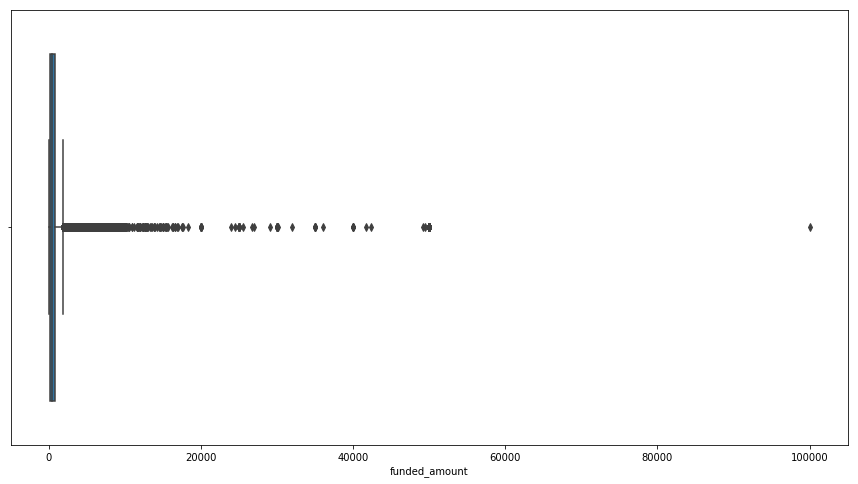

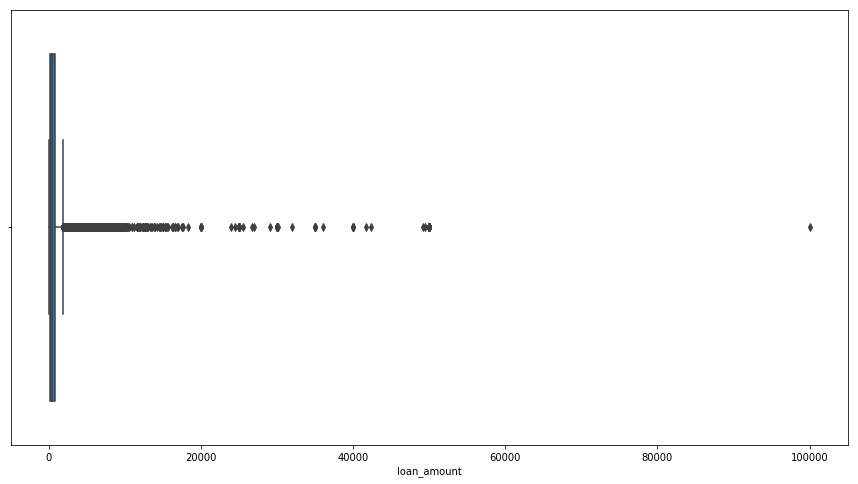

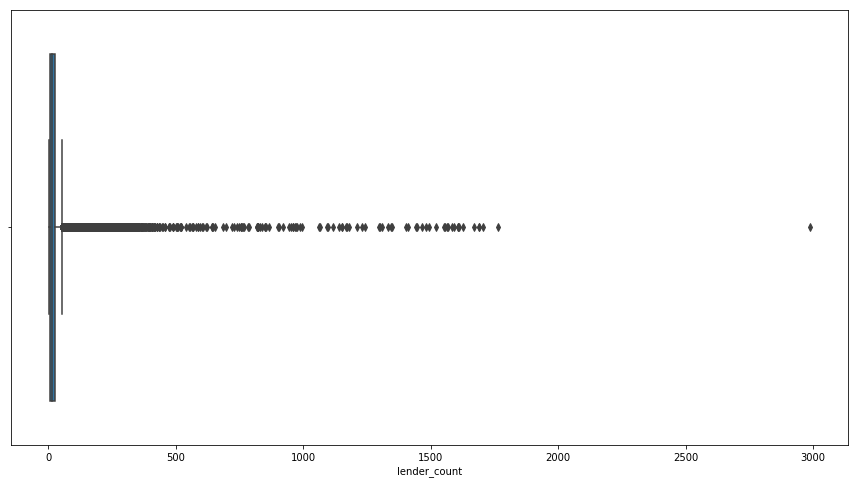

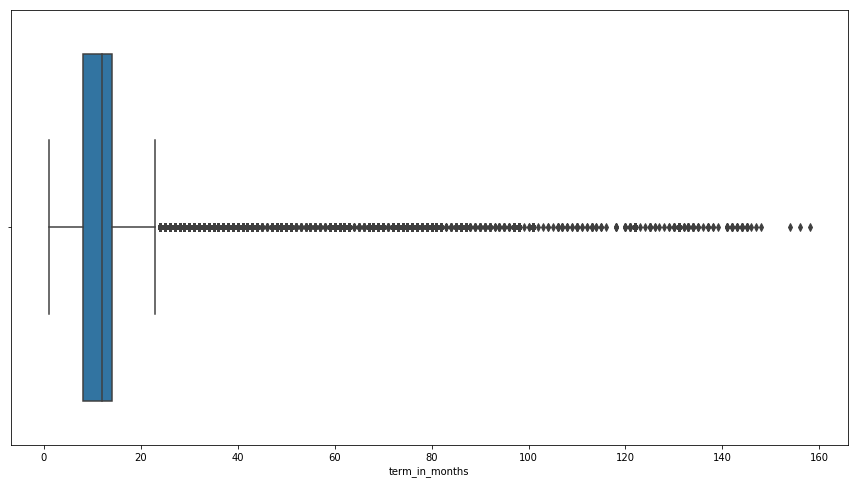

In [9]:
#Box plot for goal amount
plt.subplots(figsize=(15,8))
sns.boxplot(x=df_filtered["funded_amount"])

plt.subplots(figsize=(15,8))
sns.boxplot(x=df_filtered["loan_amount"])

plt.subplots(figsize=(15,8))
sns.boxplot(x=df_filtered["lender_count"])

plt.subplots(figsize=(15,8))
sns.boxplot(x=df_filtered["term_in_months"])

In [10]:
df_filtered.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.228750e+05,622875.000000,622875.000000,611523.000000,622875.000000,622875.000000
mean,9.901458e+05,798.360385,798.360385,178.518093,13.391143,21.029460
std,1.961753e+05,1150.425680,1150.425680,94.319818,8.523934,29.087186
min,6.530470e+05,25.000000,25.000000,9.000000,1.000000,1.000000
25%,8.198495e+05,250.000000,250.000000,126.000000,8.000000,7.000000
50%,9.905320e+05,450.000000,450.000000,145.000000,12.000000,13.000000
75%,1.160988e+06,900.000000,900.000000,204.000000,14.000000,25.000000
max,1.340316e+06,100000.000000,100000.000000,535.000000,158.000000,2986.000000


In [11]:
#df_filtered[df_filtered.loan_amount == 100000]
#df_filtered = df_filtered.drop(df_filtered[(df_filtered.loan_amount == 100000)].index)
#df_filtered.describe()

In [12]:
#Bivariate
#df_bivariate = df_filtered.loc[:,['funded_amount', 'loan_amount', 'term_in_months', 'lender_count']]
df_bivariate = df_filtered.loc[(df['currency'] == 'PHP'),['funded_amount', 'loan_amount', 'term_in_months', 'lender_count']]
df_bivariate_sample = df_bivariate.sample(n = 10000) 

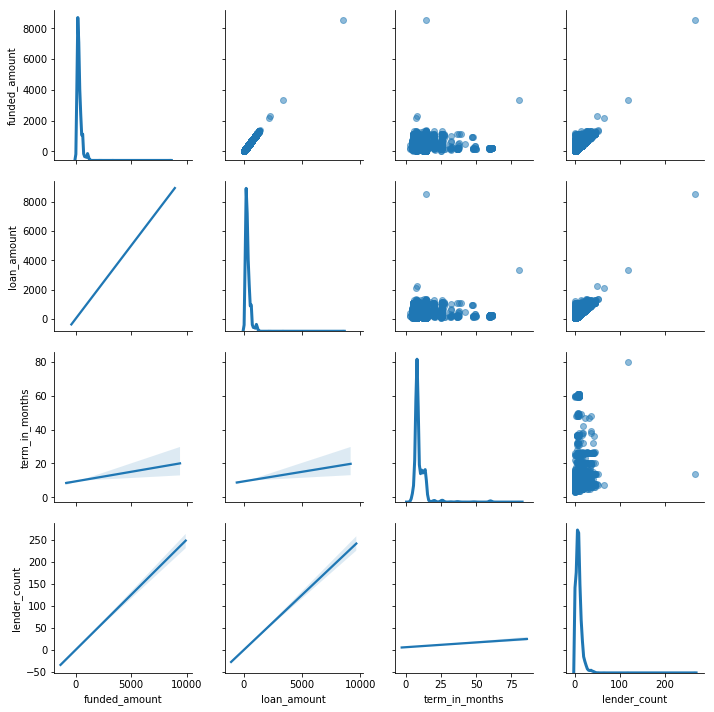

In [13]:
g = sns.PairGrid(df_bivariate_sample, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                funded_amount  loan_amount  term_in_months  lender_count
funded_amount        1.000000     1.000000        0.156124      0.848949
loan_amount          1.000000     1.000000        0.156124      0.848949
term_in_months       0.156124     0.156124        1.000000      0.242042
lender_count         0.848949     0.848949        0.242042      1.000000


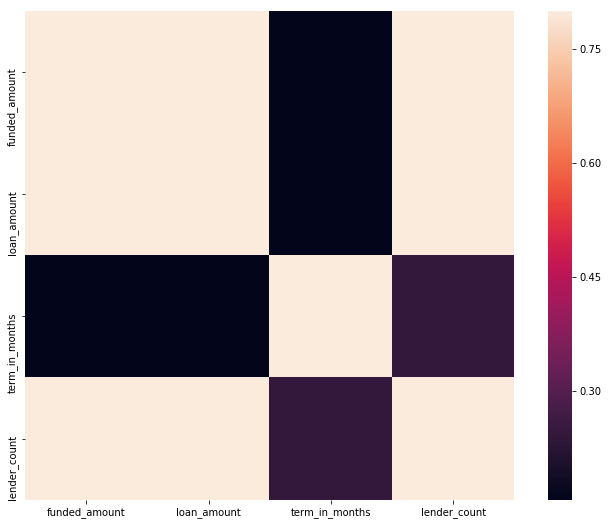

In [14]:
# Make the correlation matrix.
df_bivariate_corr = df_filtered.loc[:,['funded_amount', 'loan_amount', 'term_in_months', 'lender_count']]
corrmat = df_bivariate_corr.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

c:\users\niranjan\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


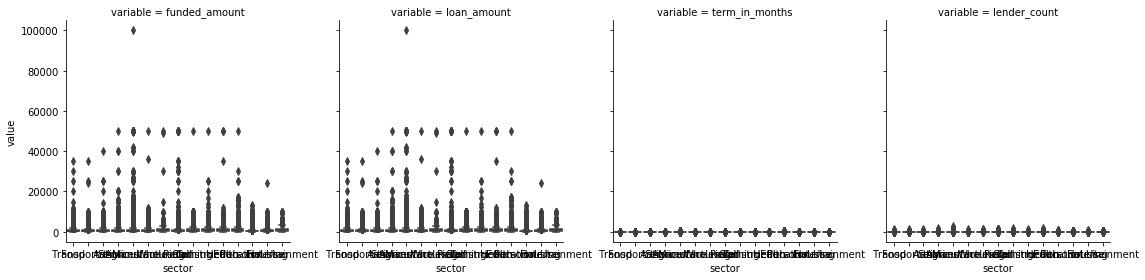

               funded_amount                                                \
                       count         mean          std   min    25%    50%   
sector                                                                       
Agriculture         166500.0   753.746547  1055.378682  25.0  275.0  500.0   
Arts                 11857.0   984.682044  1426.846628  50.0  300.0  475.0   
Clothing             29754.0  1096.932345  1442.137581  25.0  300.0  575.0   
Construction          5936.0  1019.887129  1445.803478  25.0  350.0  650.0   
Education            30235.0   971.565239  1060.021095  25.0  400.0  700.0   
Entertainment          725.0  1334.862069  1625.698208  75.0  425.0  700.0   
Food                128579.0   852.981241  1216.501011  25.0  250.0  425.0   
Health                8609.0  1015.585434  1456.895207  50.0  375.0  675.0   
Housing              29726.0   642.193702   601.750664  25.0  275.0  500.0   
Manufacturing         6162.0   862.276858  1232.170112  50.0  32

In [15]:
#categorical and continuous variables exploration for country
df_long_premelt = df_filtered.loc[:,['sector', 'funded_amount', 'loan_amount', 'term_in_months', 'lender_count']]
df_long = pd.melt(df_long_premelt, id_vars=['sector'])
df_long.head(10)

g = sns.FacetGrid(df_long, col="variable", height=4, aspect=1)
g = g.map(sns.boxplot, "sector", "value")
plt.show()

# Descriptive statistics by group.
print(df_long_premelt.groupby('sector').describe())

# Test whether group differences are significant.
for col in df_long_premelt.loc[:,'funded_amount':'lender_count'].columns:
    print(col)
    print(stats.ttest_ind(
        df_long_premelt[df_long_premelt['sector'] == 'Agriculture'][col].dropna(),
        df_long_premelt[df_long_premelt['sector'] == 'Food'][col].dropna()
    ))
    

In [16]:
#Two Categorical variables:

#list of top 10 occuring countries
#n = 10
#val = df_filtered['country'].value_counts()[:n].index.tolist()
#print(val)
#df_top10_countries = df_filtered[df_filtered.country.isin(val)]

#f, ax = plt.subplots(figsize=(15, 30))
#sns.countplot(y="country", hue="sector", data=df_top10_countries, palette="pastel")
#plt.show()

In [17]:
# Table of counts
#counttable = pd.crosstab(df_top10_countries['country'], df_top10_countries['sector'])
#print(counttable)

In [18]:
#df_top10_countries.groupby(['country','sector']).agg({'sector': 'count'})

In [19]:
#features
#1.Loan amount greater than $900
myFeatures = pd.DataFrame()
myFeatures = pd.get_dummies(df_filtered['sector'])
myFeatures['avg_loan'] = np.where(df_filtered['loan_amount']>=900, 0, 1)
#2.Terms in months greater than 14
myFeatures['avg_terms'] = np.where(df_filtered['term_in_months']>=14, 0, 1)
print(myFeatures.head(10))

   Agriculture  Arts  Clothing  Construction  Education  Entertainment  Food  \
0            0     0         0             0          0              0     1   
1            0     0         0             0          0              0     0   
2            0     0         0             0          0              0     0   
3            0     1         0             0          0              0     0   
4            0     0         0             0          0              0     1   
5            0     0         0             0          0              0     0   
6            1     0         0             0          0              0     0   
7            0     0         0             0          0              0     0   
8            0     0         0             0          0              0     0   
9            0     0         0             0          0              0     1   

   Health  Housing  Manufacturing  Personal Use  Retail  Services  \
0       0        0              0             0   

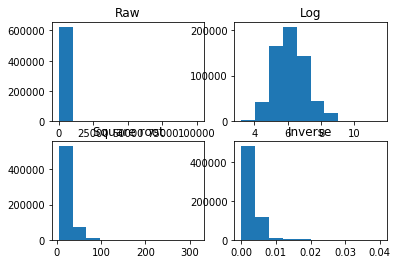

In [20]:

fig = plt.figure()
#fig, axes = plt.subplots(nrows=2, ncols=2)
#fig.tight_layout()
#fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True)

fig.add_subplot(221)
plt.hist(df_filtered['loan_amount'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df_filtered['loan_amount'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df_filtered['loan_amount'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df_filtered['loan_amount'].dropna())
plt.title('Inverse')
plt.show()


#3.loan amount has been transformed using log to normalize it
myFeatures['log_loan_amount'] = np.log(df_filtered['loan_amount'])

In [21]:
#4.Burden per lender
myFeatures['burden_per_lender'] = np.log(df_filtered['loan_amount']/df_filtered['lender_count'])

#5 Increase in burden per lender
myFeatures['if_burden_beyond_avg'] = np.where((myFeatures['burden_per_lender'].mean() - myFeatures['burden_per_lender']) > 0, 1, 0)

print(myFeatures['burden_per_lender'].mean())
print(myFeatures.head(5))

3.666900398952822
   Agriculture  Arts  Clothing  Construction  Education  Entertainment  Food  \
0            0     0         0             0          0              0     1   
1            0     0         0             0          0              0     0   
2            0     0         0             0          0              0     0   
3            0     1         0             0          0              0     0   
4            0     0         0             0          0              0     1   

   Health  Housing  Manufacturing  Personal Use  Retail  Services  \
0       0        0              0             0       0         0   
1       0        0              0             0       0         0   
2       0        0              0             0       0         0   
3       0        0              0             0       0         0   
4       0        0              0             0       0         0   

   Transportation  Wholesale  avg_loan  avg_terms  log_loan_amount  \
0               

In [22]:
sklearn_pca = PCA(n_components=4)
X = StandardScaler().fit_transform(df_bivariate_corr)
Y_sklearn = sklearn_pca.fit_transform(X)
sklearn_pca.explained_variance_ratio_

array([7.13780432e-01, 2.38377863e-01, 4.78417041e-02, 3.16889392e-27])

In [23]:
Y_sklearn

array([[-6.99289278e-01,  3.65358914e-02,  8.93291109e-02,
         8.88554774e-11],
       [-4.04985339e-01,  2.18814769e-01, -2.43938442e-02,
        -2.33832629e-18],
       [-3.48469079e-01, -3.56675631e+00, -3.53649869e-01,
         3.11888495e-17],
       ...,
       [-1.16406626e+00, -1.48310350e-01, -5.51530863e-02,
        -1.04179270e-16],
       [-1.16406626e+00, -1.48310350e-01, -5.51530863e-02,
        -1.04179270e-16],
       [-1.16406626e+00, -1.48310350e-01, -5.51530863e-02,
        -1.04179270e-16]])

In [24]:
x = df_bivariate_corr
# Separating out the features
#x = df.loc[:, features].values
# Separating out the target
#y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
#print(principalDf)